In [31]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
from PIL import Image
from io import BytesIO
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [4]:
url="https://bdfed.stitch.mlbinfra.com/bdfed/stats/team?stitch_env=prod&season=2023&sportId=1&stats=season&group=&gameType=R&limit=50&offset=0&sortStat=homeRuns&order=desc"

In [5]:
r=requests.get(url)
r.status_code

200

ValueError: Could not save to JPEG for display

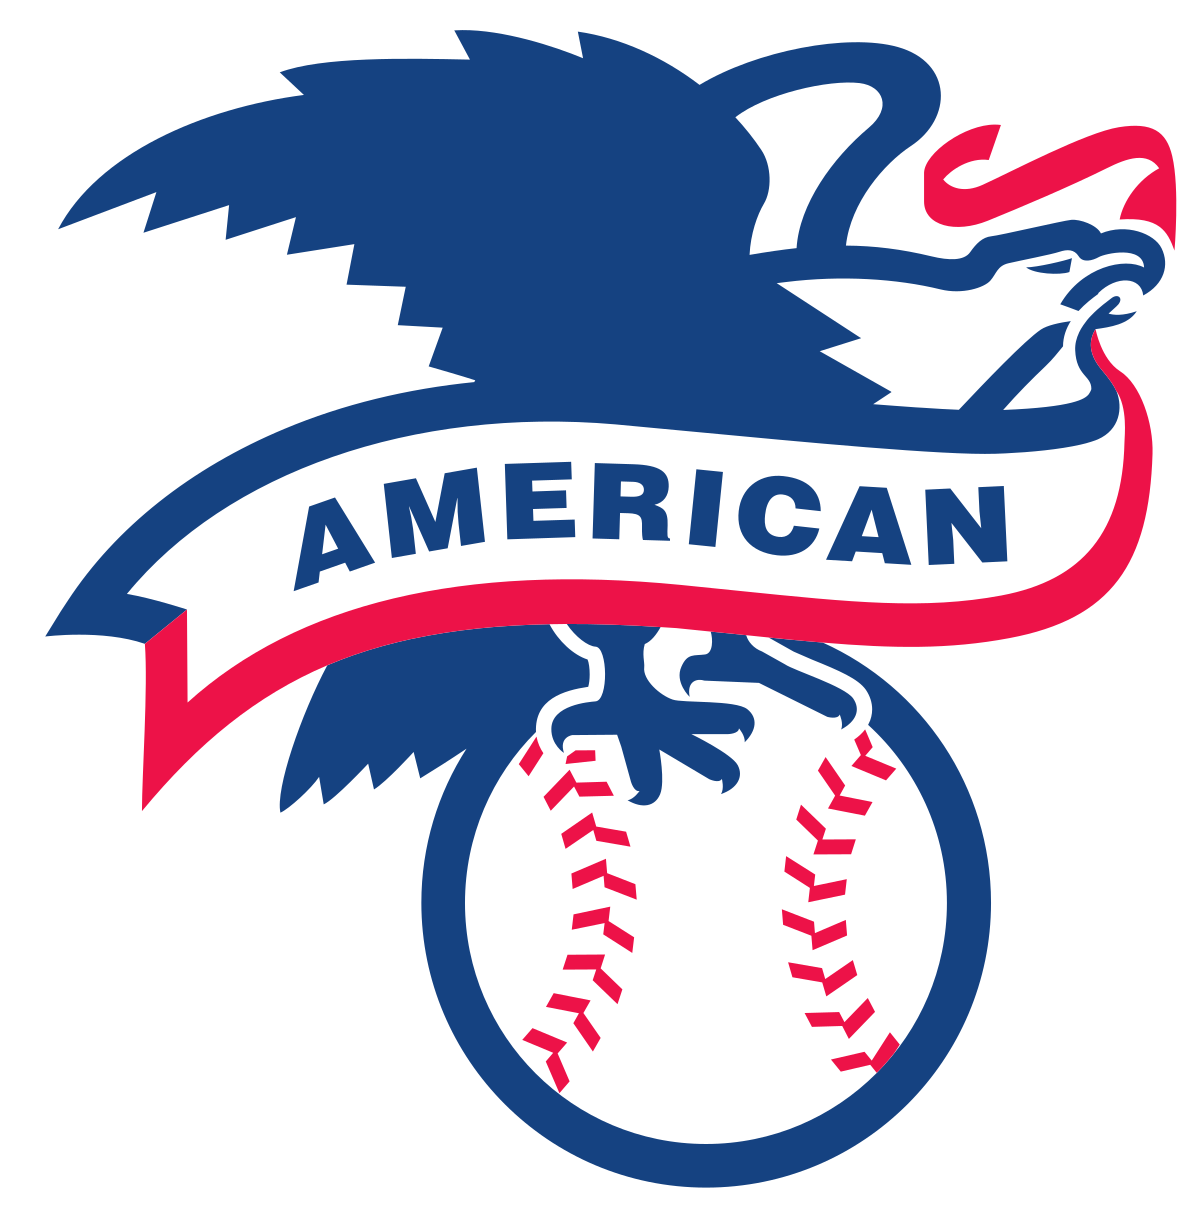

In [32]:
#Images
url_americana = "https://upload.wikimedia.org/wikipedia/en/thumb/5/54/American_League_logo.svg/1200px-American_League_logo.svg.png"
response = requests.get(url_americana)
logo_a = Image.open(BytesIO(response.content))
logo_a

ValueError: Could not save to JPEG for display

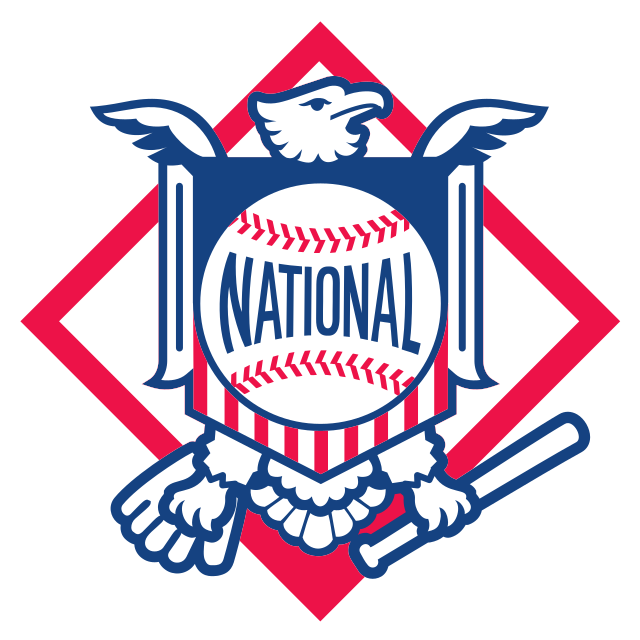

In [33]:
url_nacional = "https://upload.wikimedia.org/wikipedia/en/thumb/d/d4/MLB_National_League_logo.svg/640px-MLB_National_League_logo.svg.png"
response = requests.get(url_nacional)
logo_n = Image.open(BytesIO(response.content))
logo_n

In [6]:
#Obtener json
data=r.json()
data

{'totalSplits': 30,
 'playerPool': None,
 'stats': [{'year': '2023',
   'type': 'team',
   'rank': 1,
   'shortName': 'Atlanta',
   'teamId': 144,
   'teamAbbrev': 'ATL',
   'teamName': 'Atlanta Braves',
   'teamShortName': 'Braves',
   'leagueAbbrev': 'NL',
   'leagueName': 'National League',
   'leagueShortName': 'National',
   'gamesPlayed': 162,
   'groundOuts': 1396,
   'airOuts': 1414,
   'runs': 947,
   'doubles': 293,
   'triples': 23,
   'homeRuns': 307,
   'strikeOuts': 1289,
   'baseOnBalls': 538,
   'intentionalWalks': 20,
   'hits': 1543,
   'hitByPitch': 67,
   'avg': '.276',
   'atBats': 5597,
   'obp': '.344',
   'slg': '.501',
   'ops': '.845',
   'caughtStealing': 27,
   'stolenBases': 132,
   'stolenBasePercentage': '.830',
   'groundIntoDoublePlay': 128,
   'numberOfPitches': 24463,
   'plateAppearances': 6249,
   'totalBases': 2803,
   'rbi': 916,
   'leftOnBase': 1062,
   'sacBunts': 2,
   'sacFlies': 43,
   'babip': '.306',
   'groundOutsToAirouts': '0.99',
   'c

In [7]:
len(data["stats"])

30

In [23]:
teams=[]
runs=[]
league=[]
pitches=[]
stolen_bases=[]

for i in range(len(data["stats"])):
    teams.append(data["stats"][i]["teamName"])
    runs.append(data["stats"][i]["runs"])
    league.append(data["stats"][i]["leagueName"])
    pitches.append(data["stats"][i]["numberOfPitches"])
    stolen_bases.append(data["stats"][i]["stolenBases"])


In [25]:
df=pd.DataFrame({"team":teams,"runs":runs,"league":league, "pitches":pitches, "stolen_bases":stolen_bases})
#Sumar carreras por liga
df=df.groupby("league")["stolen_bases"].sum().reset_index()
#Porcentaje de robos
df["stolen_bases"]=df["stolen_bases"]/df["stolen_bases"].sum()*100
df

,league,stolen_bases
0,American League,47.987439
1,National League,52.012561


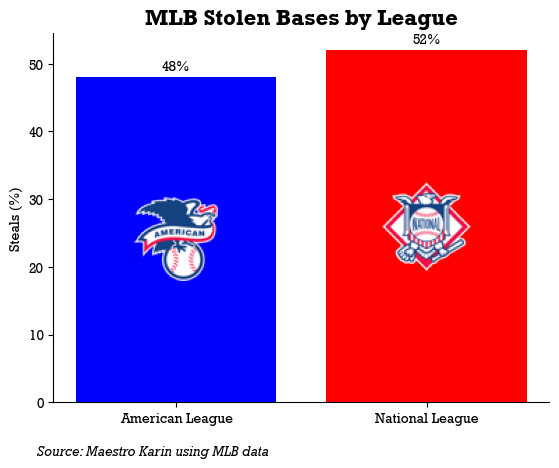

In [47]:
fig, ax = plt.subplots()
bars = ax.bar(df["league"], df["stolen_bases"], color=["blue", "red"])
ax.set_ylabel("Steals (%)")
ax.set_title("MLB Stolen Bases by League", fontsize=16, fontweight="bold")
# Adjust the size of your logos as needed
logo_a_resized = logo_a.resize((int(logo_a.width * 0.05), int(logo_a.height * 0.05)))
logo_n_resized = logo_n.resize((int(logo_n.width * 0.1), int(logo_n.height * 0.1)))

# Iterate through the bars and the league DataFrame together
for bar, league_name in zip(bars, df["league"]):
    # Choose the logo based on the league
    logo = logo_a_resized if league_name == "American League" else logo_n_resized
    

    logo_image = OffsetImage(logo)
    
    # Get the center of the bar
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height() / 2
    
    # Create an annotation box
    ab = AnnotationBbox(logo_image, (x, y), frameon=False, box_alignment=(0.5, 0.5))
    
    # Add the box to the plot
    ax.add_artist(ab)

# Labeling the bars with their height
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.0f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Removing top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#Source 
plt.figtext(0.1, 0, "Source: Maestro Karin using MLB data", fontsize=10, fontstyle="italic")

#sSalvar imagen
plt.savefig("mlb_robos.png", dpi=100, bbox_inches="tight")
